# Data Preparation Exercises

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import requests
import os

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

from datetime import timedelta, datetime

### Exercises I

Using your store items data:

1. Convert date column to datetime format.
2. Plot the distribution of sale_amount and item_price.
3. Set the index to be the datetime variable.
4. Add a 'month' and 'day of week' column to your dataframe.
5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

## Acquire Data

In [2]:
items = acquire.get_df('items')
stores = acquire.get_df('stores')
sales = acquire.get_df('sales')

In [3]:
df = acquire.combine_df(items, sales, stores)

In [4]:
df.columns

Index(['Unnamed: 0_x', 'item_brand', 'item', 'item_name', 'item_price',
       'item_upc12', 'item_upc14', 'Unnamed: 0_y', 'sale_amount', 'sale_date',
       'sale_id', 'store', 'Unnamed: 0', 'store_address', 'store_city',
       'store_state', 'store_zipcode'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], inplace=True)

In [6]:
df.head(2)

,item_brand,item,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_date,sale_id,store,store_address,store_city,store_state,store_zipcode
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


**1. Convert date column to datetime format.**

In [7]:
# sale date is not in datetime format
df.dtypes

item_brand        object
item               int64
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
sale_amount      float64
sale_date         object
sale_id            int64
store              int64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
dtype: object

In [9]:
df.sale_date = pd.to_datetime(df.sale_date)
df.head(2)

,item_brand,item,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_date,sale_id,store,store_address,store_city,store_state,store_zipcode
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [10]:
df.dtypes

item_brand                    object
item                           int64
item_name                     object
item_price                   float64
item_upc12                     int64
item_upc14                     int64
sale_amount                  float64
sale_date        datetime64[ns, UTC]
sale_id                        int64
store                          int64
store_address                 object
store_city                    object
store_state                   object
store_zipcode                  int64
dtype: object

**2. Plot the distribution of sale_amount and item_price.**

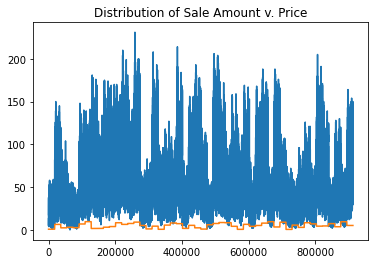

In [11]:
# plot both sale_amount and item_price
df.sale_amount.plot()
df.item_price.plot()
plt.title('Distribution of Sale Amount v. Price');

**3. Set the index to be the datetime variable.**

In [12]:
# set sale_date as index
df = df.set_index('sale_date').sort_index()

**4. Add a 'month' and 'day of week' column to your dataframe.**

In [13]:
df['month'] = df.index.month
df['weekday'] = df.index.day_name()

In [14]:
df.head(2)

,item_brand,item,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday
2013-01-01 00:00:00+00:00,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday


**5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.**

In [15]:
df.head(1)

,item_brand,item,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday


In [16]:
df['sales_total'] = df.sale_amount*df.item_price

In [17]:
# make a function that automates everything above
def prep_items(df):
    '''
    This function takes in dataframe and drops unnecessary columns, adds a month, weekday and sales_total column
    '''
    # drop extra columns
    df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], inplace=True)

    # change date column to datetime
    df.sale_date = pd.to_datetime(df.sale_date)

    # change date to index
    df = df.set_index('sale_date').sort_index()

    # create month and column year
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()

    # create sales total column
    df['sales_total'] = df.sale_amount*df.item_price

    return df

### Exercises II
Using opsd_germany_daily.csv

1. Convert date column to datetime format.
2. Plot the distribution of each of your variables.
3. Set the index to be the datetime variable.
4. Add a month and a year column to your dataframe.
5. Fill any missing values.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [47]:
df = acquire.get_germany()

In [48]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


**1. Convert date column to datetime format.**

In [49]:
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [50]:
df.Date = pd.to_datetime(df.Date)

In [51]:
df.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

**2. Plot the distribution of each of your variables.**

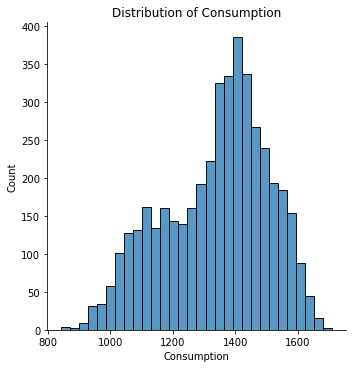

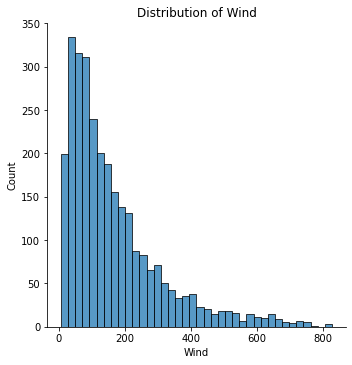

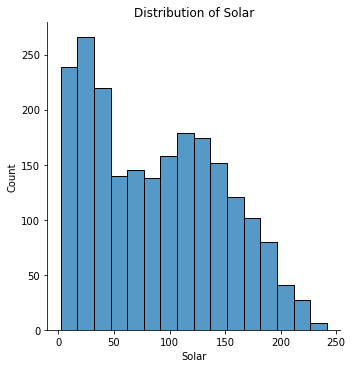

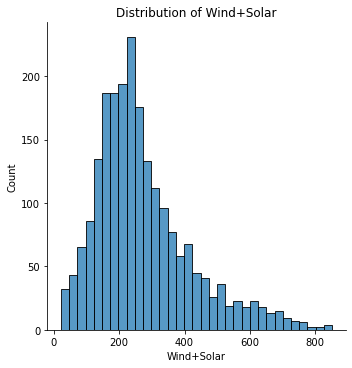

In [52]:
# visualize distributions of each column
cols = df.drop(columns='Date')
for i in cols:
    sns.displot(df, x=i)
    plt.title('Distribution of '+i)
    plt.show()

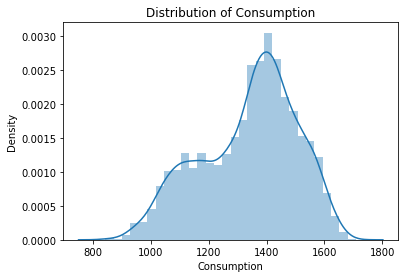

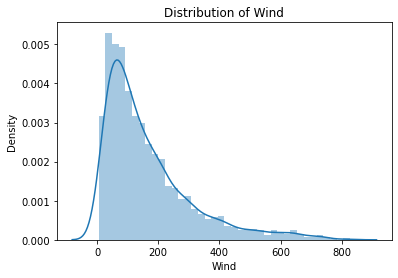

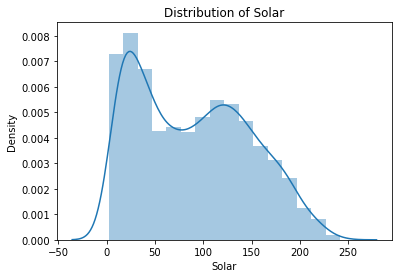

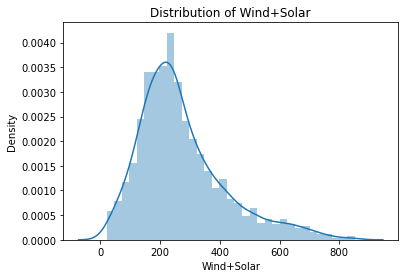

In [53]:
cols = df.drop(columns='Date')
for i in cols:
    x = df[i]
    ax = sns.distplot(x)
    plt.title('Distribution of '+i)
    plt.show()

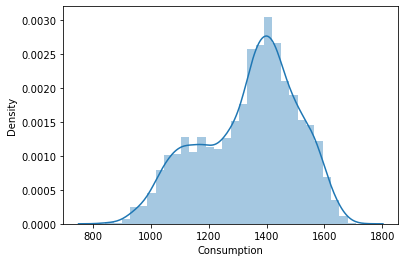

In [54]:
x = df.Consumption
ax = sns.distplot(x)

**3. Set the index to be the datetime variable.**

In [55]:
df = df.set_index('Date').sort_index()

**4. Add a month and a year column to your dataframe.**

In [56]:
df['month'] = df.index.month
df['year'] = df.index.year

**5. Fill any missing values.**

In [57]:
df.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [58]:
values = {'Consumption': df.Consumption.mean(),
          'Wind': df.Wind.mean(),
          'Solar': df.Solar.mean(),
          'Wind+Solar': df['Wind+Solar'].mean()}

df.fillna(value=values, inplace=True)

In [59]:
df.isnull().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

In [60]:
def prep_germany(df):
    
    # convert Date column to datetime
    df.Date = pd.to_datetime(df.Date)
    
    # set date column as index
    df = df.set_index('Date').sort_index()
    
    # make a month and year column
    df['month'] = df.index.month
    df['year'] = df.index.year
    
    # fill nulls with mean average
    values = {'Consumption': df.Consumption.mean(),
          'Wind': df.Wind.mean(),
          'Solar': df.Solar.mean(),
          'Wind+Solar': df['Wind+Solar'].mean()}

    df.fillna(value=values, inplace=True)
    
    return df